In [1]:
import os

def import_from_directory(directory, module_name):
    current_dir = os.getcwd()
    os.chdir(directory)
    module = __import__(module_name)
    os.chdir(current_dir)
    return module

test_base = import_from_directory('/home/jovyan/work/spectrum/notebooks/src', 'test_base')
model_base = import_from_directory('/home/jovyan/work/spectrum/notebooks/src', 'model_base')

2024-05-14 08:43:50.498985: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 08:43:50.684883: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 08:43:50.684984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 08:43:50.714010: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-14 08:43:50.777691: I tensorflow/core/platform/cpu_feature_guar

In [2]:
SEED = 42
model_base.set_seed(SEED)

desired_directory = '/home/jovyan/work/spectrum/notebooks/'
os.chdir(desired_directory)

In [3]:
import pandas as pd

In [5]:
df0 = pd.read_csv('Data/df.csv').rename(columns={'Unnamed: 0': 'indexid'})
df = pd.read_csv('Data/tabledata_all.csv')
dfx = df.merge(df0[['AlignmentID', 'INCHIKEY','MSMSspectrum', 'indexid']], on=['AlignmentID', 'INCHIKEY','MSMSspectrum'], how='left')
dfx = dfx.drop_duplicates(subset=['datasetID','AlignmentID', 'INCHIKEY','MSMSspectrum']).reset_index(drop=True).\
sort_values('indexid', ascending=True)

In [6]:
df_neg = dfx[dfx['Adducttype'].str.contains('\]\-') | dfx['Adducttype'].str.contains('\]2\-')].reset_index(drop=True)
df_neg2 = model_base.cal_df_sel_column(df_neg)
df_neg_wide = model_base.cal_wide_df(df_neg2)

In [7]:
df_neg2

,MSMSspectrum,Metabolitename,Ontology,AverageMz,Adducttype,ID
0,78.95988:886 122.00207:48 136.99457:12 140.010...,LPE O-16:1,EtherLPE,436.28204,[M-H]-,58_699
1,133.08577:3 196.02791:4 196.0338:8 241.2148:16...,LPE 15:0,LPE,438.25980,[M-H]-,58_700
2,140.0134:6 196.02803:18 196.03587:30 214.02856...,LPE 16:1,LPE,450.26331,[M-H]-,58_731
3,78.95659:60 140.00105:12 140.01266:36 152.9968...,LPE 16:0,LPE,452.27884,[M-H]-,58_734
4,78.95624:162 140.00037:12 140.01199:117 196.00...,LPE O-18:2,EtherLPE,462.29541,[M-H]-,58_749
...,...,...,...,...,...,...
8158,71.01044:9 72.98961:3 83.01072:6 89.02385:12 9...,AHexCer 58:0;3O|AHexCer (O-16:0)18:0;2O/24:0;O,AHexCer,1126.94238,[M+CH3COO]-,72_1115
8159,71.01062:6 83.01207:18 89.02152:12 101.02273:1...,AHexCer 60:3;3O|AHexCer (O-18:1)20:2;2O/22:0;O,AHexCer,1148.92432,[M+CH3COO]-,72_1118
8160,71.01298:3 73.03612:3 83.01356:12 89.02332:9 1...,AHexCer 60:2;3O|AHexCer (O-18:1)20:1;2O/22:0;O,AHexCer,1150.94202,[M+CH3COO]-,72_1119
8161,71.01167:7 83.01247:12 83.02066:2 87.00587:5 8...,AHexCer 60:1;3O|AHexCer (O-18:0)20:1;2O/22:0;O,AHexCer,1152.95496,[M+CH3COO]-,72_1120


".ms" fileの作成

In [8]:
output_file_path = 'Data/test_data/neg/ms2_spectrum_ms_neg'
test_base.make_ms_file(df_neg, output_file_path)

In [108]:
zip_filename = 'Data/test_data/neg/ms2_spectrum_ms_neg.zip'
test_base.make_zipfile(output_file_path, zip_filename)

canopusでの予測結果の読み込み

In [9]:
canopus_result_path = 'Data/test_data/neg/canopus_compound_summary_neg.tsv'
select_ont_path = 'Data/test_data/neg/subclass_ont_select_neg.csv'
ytest_path = 'Data/model_data/neg/df_neg_ytest.csv'
model_test_result = 'Data/model_data/neg/df_neg_subclass_pred_each.csv'
df_model_canopus = test_base.read_canopus_output(canopus_result_path, select_ont_path, ytest_path, model_test_result, df_neg_wide, df_neg2)

In [10]:
df_neg_cano_class_summary = test_base.df_comp_pred_result(df_model_canopus)

In [22]:
excel_file_path = 'Data/model_data/neg/classification_reports_neg.xlsx'
test_base.make_classification_reports(df_model_canopus.astype(str), excel_file_path)

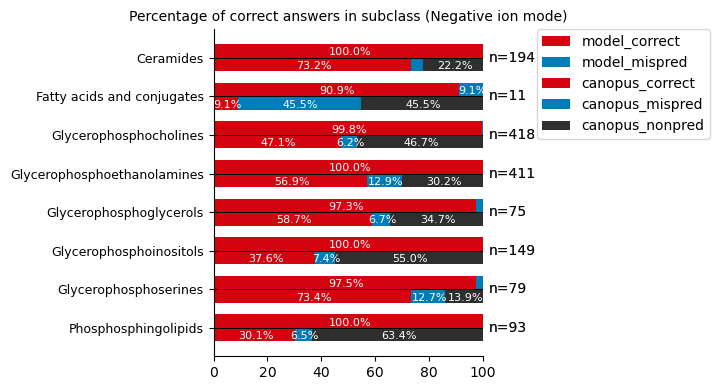

In [23]:
save_fig_path = 'Data/test_data/neg/canopus_compound_summary_neg.svg'
test_base.plot_canopus_result(df_neg_cano_class_summary, save_fig_path, title='Percentage of correct answers in subclass (Negative ion mode)')